<a href="https://colab.research.google.com/github/DheniMoura/Mortalidade-Infantil-vs-Saneamento-B-sico-no-Brasil/blob/main/Mortalidade_Infantil_vs_Saneamento_B%C3%A1sico_no_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objetivo do Projeto
Este projeto tem como objetivo verificar a existência de correlação entre as taxas de mortalidade infnatil e a infraestrutura de sanamento nos munícipios brasileiros.

# Ferramentas
- Google Colab para visualização e análise
- Python como liguagem, juntamente com as biliotecas:
  - pandas
  - numpy
  - matplotlib
  - pearsonr
- Fontes de Dados:
  - [DATASUS](https://datasus.saude.gov.br/informacoes-de-saude-tabnet/)

In [1]:
# Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from collections import defaultdict


# Pré-processamento
- importação de dados
- pré-visualização de dados
- conversão de colunas e padronização

In [2]:
# 🔹 Leitura dos Dados
df_mort_1 = pd.read_csv("/content/drive/MyDrive/dados_EDA_mortalidade_infantil/obito_infatil_1979_a_1995.csv",  sep=';', encoding="latin1")
df_mort_2 = pd.read_csv("/content/drive/MyDrive/dados_EDA_mortalidade_infantil/obito_infantil_1996_a_2023.csv",  sep=';', encoding="latin1")
df_agua = pd.read_csv("/content/drive/MyDrive/dados_EDA_mortalidade_infantil/abastecimento_de_agua_por_domicilio_1991_a_2010.csv",  sep=';', encoding="latin1")
df_lixo = pd.read_csv("/content/drive/MyDrive/dados_EDA_mortalidade_infantil/coleta_de_lixo_por_domicilio_1991_a_2010.csv",  sep=';', encoding="latin1")
df_sanit = pd.read_csv("/content/drive/MyDrive/dados_EDA_mortalidade_infantil/instalacoes_sanitarias_por_domicilio_1991_a_2010.csv",  sep=';', encoding="latin1")
df_sus = pd.read_csv("/content/drive/MyDrive/dados_EDA_mortalidade_infantil/recursos_federais_1996_a_2006.csv",  sep=';', encoding="latin1")
df_letr = pd.read_csv("/content/drive/MyDrive/dados_EDA_mortalidade_infantil/taxa_analfabetismo_1996_a_2010.csv",  sep=';', encoding="latin1")
df_bolsa = pd.read_csv("/content/drive/MyDrive/dados_EDA_mortalidade_infantil/estado_nutricional_bolsa_familia.csv",  sep=';', encoding="latin1")
df_renda = pd.read_csv("/content/drive/MyDrive/dados_EDA_mortalidade_infantil/trabalho_e_renda_por_domicilio_1996_a_2010.csv",  sep=';', encoding="latin1")

In [3]:
dfs = {
"df_mort_1": df_mort_1,
"df_mort_2": df_mort_2,
"df_agua": df_agua,
"df_lixo": df_lixo,
"df_sanit": df_sanit,
"df_sus": df_sus,
"df_letr":df_letr,
"df_bolsa":df_bolsa,
"df_renda":df_renda
}

# visualização das primeiras linhas e colunas
for nome, df in dfs.items():
  print(f"\n{nome}")
  print("-" * 40)
  print("Colunas:", df.columns.tolist())
  print(df.head(3))


df_mort_1
----------------------------------------
Colunas: ['Município', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', 'Total']
                      Município 1979 1980 1981 1982 1983 1984 1985 1986 1987  \
0       MUNICIPIO IGNORADO - RO    -    -    9    7    6    4    7   12   11   
1  110001 ALTA FLORESTA D'OESTE    -    -    -    -    -    -    -    -    -   
2              110002 ARIQUEMES  106  129  149  134  109  103  119  171  143   

  1988 1989 1990 1991 1992 1993 1994 1995   Total  
0    8    4   15   25    -    7    1    -   116.0  
1   23   23   29   24   27   21   15   16   178.0  
2  116  110  106  129   82   76   93   73  1948.0  

df_mort_2
----------------------------------------
Colunas: ['Município', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', 

In [4]:
# Mapeamento das colunas
colunas_df = defaultdict(set)
for nome, df in dfs.items():
  for col in df.columns:
    colunas_df[col].add(nome)

# Destacando clunas em comum
print("\n Colunas presentes em múltiplos DataFrames:")
for coluna, dfs_usando in colunas_df.items():
  if len(dfs_usando) > 1:
    print(f" '{coluna}': usado em {len(dfs_usando)} DataFrames -> {sorted(dfs_usando)}")


 Colunas presentes em múltiplos DataFrames:
 'Município': usado em 8 DataFrames -> ['df_agua', 'df_letr', 'df_lixo', 'df_mort_1', 'df_mort_2', 'df_renda', 'df_sanit', 'df_sus']
 '1991': usado em 6 DataFrames -> ['df_agua', 'df_letr', 'df_lixo', 'df_mort_1', 'df_renda', 'df_sanit']
 'Total': usado em 6 DataFrames -> ['df_bolsa', 'df_letr', 'df_mort_1', 'df_mort_2', 'df_renda', 'df_sus']
 '1996': usado em 2 DataFrames -> ['df_mort_2', 'df_sus']
 '1997': usado em 2 DataFrames -> ['df_mort_2', 'df_sus']
 '1998': usado em 2 DataFrames -> ['df_mort_2', 'df_sus']
 '1999': usado em 2 DataFrames -> ['df_mort_2', 'df_sus']
 '2000': usado em 7 DataFrames -> ['df_agua', 'df_letr', 'df_lixo', 'df_mort_2', 'df_renda', 'df_sanit', 'df_sus']
 '2001': usado em 2 DataFrames -> ['df_mort_2', 'df_sus']
 '2002': usado em 2 DataFrames -> ['df_mort_2', 'df_sus']
 '2003': usado em 2 DataFrames -> ['df_mort_2', 'df_sus']
 '2004': usado em 2 DataFrames -> ['df_mort_2', 'df_sus']
 '2005': usado em 2 DataFrames 

In [5]:
# Unindo DFs de mortalidade

df_mortalidade = pd.concat([df_mort_1, df_mort_2], ignore_index=True)

In [6]:
# Função para transformar qualquer DataFrame:

def transformar_para_longo(df, nome_variavel, anos):
  df_long = df.melt(id_vars="Município", value_vars=anos,
  var_name="Ano", value_name=nome_variavel)
  return df_long

In [7]:
# Transformar os DFs de formato wide para formato longo, com três colunas: Município, Ano, Valor

anos_comuns = ['1991', '2000', '2010']

df_agua_long = transformar_para_longo(df_agua, "agua", anos_comuns)
df_mort_long = transformar_para_longo(df_mortalidade, "mortalidade", anos_comuns)
df_lixo_long = transformar_para_longo(df_lixo, "lixo", anos_comuns)
df_sanit_long = transformar_para_longo(df_sanit, "saneamento", anos_comuns)
df_letr_long = transformar_para_longo(df_letr, "letramento", anos_comuns)
df_renda_long = transformar_para_longo(df_renda, "renda", anos_comuns)

In [8]:
# Unindo todos os dados em um único DF

df_base = (
    df_mort_long
        .merge(df_agua_long, on=["Município", "Ano"], how="left")
        .merge(df_lixo_long, on=["Município", "Ano"], how="left")
        .merge(df_sanit_long, on=["Município", "Ano"], how="left")
        .merge(df_letr_long, on=["Município", "Ano"], how="left")
        .merge(df_renda_long, on=["Município", "Ano"], how="left")
)

# Análise Exploratória
- Distribuição das taxas de mortalidade infantil.
- Percentual médio de acesso a saneamento básico por região.
- Mapa de calor de correlação entre as variáveis.

In [9]:
# Observando o DF

df_base.info()
df_base.describe()
df_base.isna().mean() # proporção de dados que faltam em cada coluna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31368 entries, 0 to 31367
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Município    31368 non-null  object
 1   Ano          31368 non-null  object
 2   mortalidade  16042 non-null  object
 3   agua         31176 non-null  object
 4   lixo         31341 non-null  object
 5   saneamento   31176 non-null  object
 6   letramento   31341 non-null  object
 7   renda        31341 non-null  object
dtypes: object(8)
memory usage: 1.9+ MB


,0
Município,0.000000
Ano,0.000000
mortalidade,0.488587
agua,0.006121
lixo,0.000861
saneamento,0.006121
letramento,0.000861
renda,0.000861


Qualidade dos dados:

- Mortalidade está com quase 49% de valores ausentes.
- As demais variáveis têm poucos valores ausentes (~0,6%).

In [10]:
# Substituindo "," por "."
for col in ["letramento", "renda"]:
  df_base[col] = (
    df_base[col].str.replace(",", ".", regex=False)
    )
  df_base[col] = pd.to_numeric(df_base[col], errors="coerce")


# Convertendo colunas numéricas (mortalidade, agua, etc.) para tipo float:
colunas_numericas = ["mortalidade", "agua", "lixo", "saneamento", "letramento", "renda"]
for col in colunas_numericas:
  df_base[col] = pd.to_numeric(df_base[col], errors="coerce")

# Convertendo ano para inteiro
df_base["Ano"] = df_base["Ano"].astype(int)


In [11]:
# Observando o DF
df_base[colunas_numericas].describe()

,mortalidade,agua,lixo,saneamento,letramento,renda
count,12684.000000,2.967200e+04,2.967200e+04,2.967200e+04,29672.000000,29672.000000
mean,30.753390,1.835884e+04,1.835884e+04,1.835884e+04,21.467784,348.994206
std,1045.852346,6.642252e+05,6.642252e+05,6.642252e+05,14.023874,228.545047
min,1.000000,1.910000e+02,1.910000e+02,1.910000e+02,0.800000,35.490000
25%,2.000000,1.527000e+03,1.527000e+03,1.527000e+03,10.400000,173.500000
50%,4.000000,2.963000e+03,2.963000e+03,2.963000e+03,17.800000,287.450000
75%,11.000000,6.064000e+03,6.064000e+03,6.064000e+03,29.900000,485.740000
max,86969.000000,5.732417e+07,5.732417e+07,5.732417e+07,86.200000,3468.200000


Interpretação rápida:

- mortalidade: há valores muito altos (máx ~86 mil), o que pode indicar outliers (possivelmente soma de óbitos em municípios grandes).
- agua, lixo e saneamento: valores absolutos (não percentuais), o que limita a comparação entre municípios.
- letramento e renda: valores coerentes (ex: média de 21% de analfabetismo, média de R$ 348 de renda), já podem ser usados em análises comparativas.

# Visualizações
- Gráfico de dispersão
- Boxplot

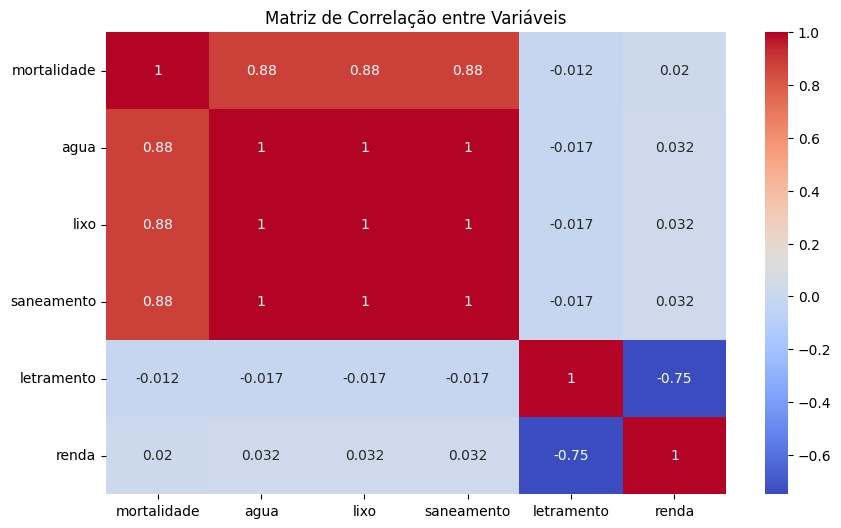

In [12]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_base[colunas_numericas].corr(), annot=True, cmap="coolwarm")
plt.title("Matriz de Correlação entre Variáveis")
plt.show()

Principais insights da correlação:

- Há uma correlação forte e positiva (0.88) entre mortalidade infantil e os serviços de água, lixo e saneamento. (quanto mais serviços, menor a mortalidade infantil)
- Correlação quase nula entre mortalidade infantil e letramento (-0.012) e entre mortalidade infantil e renda (0.02)
- Há uma correlaço forte e negativa entre letramento e renda (quanto maior o letramento, menor o analfabetismo e maior a renda média)


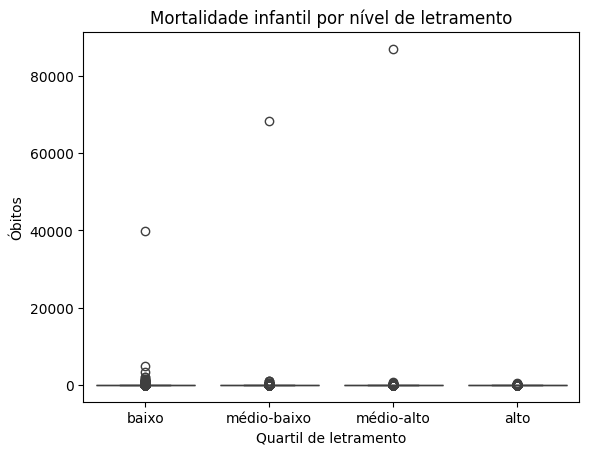

In [13]:
# Boxplot Letramento
df_base["letramento_q"] = pd.qcut(df_base["letramento"], 4, labels=["baixo", "médio-baixo", "médio-alto", "alto"])

sns.boxplot(x="letramento_q", y="mortalidade", data=df_base)
plt.title("Mortalidade infantil por nível de letramento")
plt.ylabel("Óbitos")
plt.xlabel("Quartil de letramento")
plt.show()

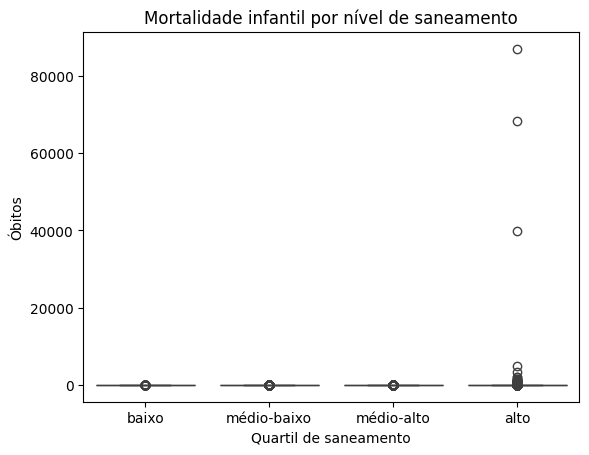

In [14]:
# Boxplot Saneamento
df_base["saneamento_q"] = pd.qcut(df_base["saneamento"], 4, labels=["baixo", "médio-baixo", "médio-alto", "alto"])

sns.boxplot(x="saneamento_q", y="mortalidade", data=df_base)
plt.title("Mortalidade infantil por nível de saneamento")
plt.ylabel("Óbitos")
plt.xlabel("Quartil de saneamento")
plt.show()

# Análise Estatística
- Correlação de Pearson entre taxa de mortalidade e cada variável de saneamento.
- Eventual regressão linear simples para visualizar a tendência.

In [15]:
#Correlação de Pearson
variaveis = ['agua', 'lixo', 'saneamento', 'renda', 'letramento']
for var in variaveis:
  correlacao = df_base[['mortalidade', var]].dropna().corr(method='pearson').iloc[0, 1]
  print(f"Correlação de Pearson entre mortalidade e {var}: {correlacao:.3f}")

Correlação de Pearson entre mortalidade e agua: 0.882
Correlação de Pearson entre mortalidade e lixo: 0.882
Correlação de Pearson entre mortalidade e saneamento: 0.882
Correlação de Pearson entre mortalidade e renda: 0.020
Correlação de Pearson entre mortalidade e letramento: -0.012


Agua, lixo e sanemanto apresentam valores identicos, enquanto

/tmp/ipython-input-16-4255067105.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_corr, x='Variável', y='Correlação com Mortalidade', palette='coolwarm')


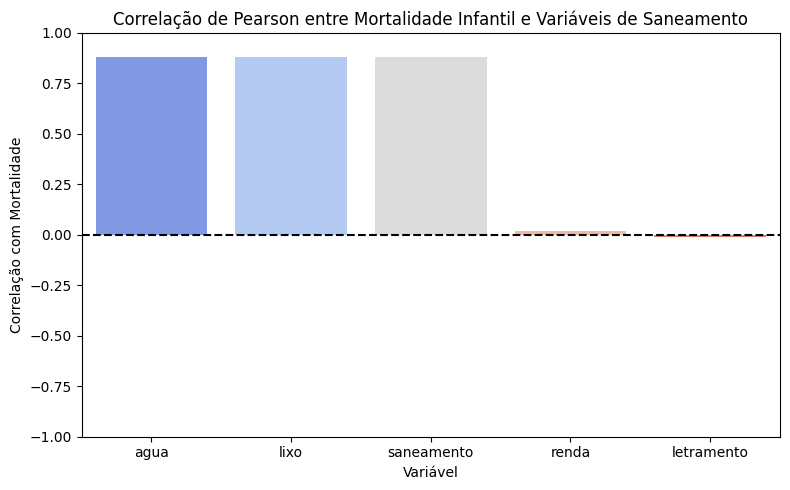

In [16]:
correlacoes = {
var: df_base[['mortalidade', var]].dropna().corr().iloc[0, 1]
for var in variaveis
}

df_corr = pd.DataFrame.from_dict(correlacoes, orient='index', columns=['Correlação com Mortalidade']).reset_index()
df_corr.rename(columns={'index': 'Variável'}, inplace=True)


plt.figure(figsize=(8, 5))
sns.barplot(data=df_corr, x='Variável', y='Correlação com Mortalidade', palette='coolwarm')
plt.title('Correlação de Pearson entre Mortalidade Infantil e Variáveis de Saneamento')
plt.ylim(-1, 1)
plt.axhline(0, color='black', linestyle='--')
plt.tight_layout()
plt.show()

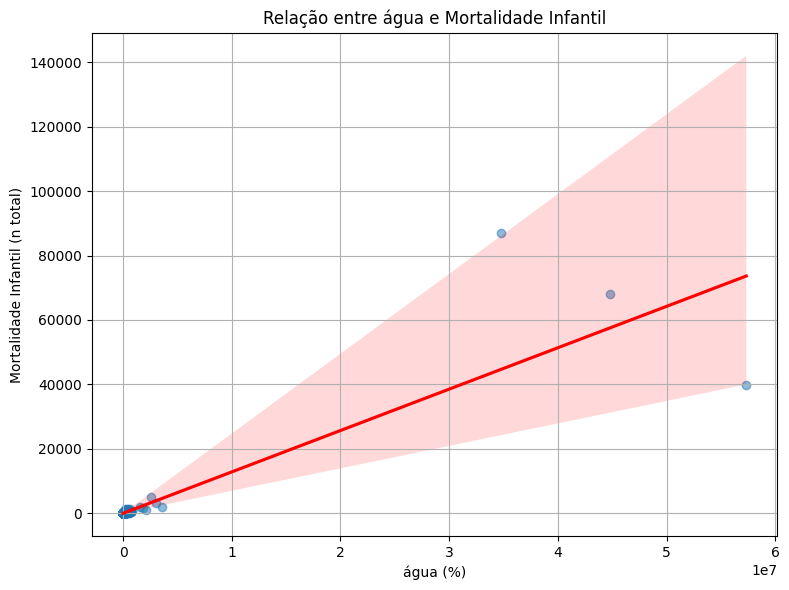

In [17]:
# Regressão linear
df_plot = df_base[["mortalidade", "agua"]].dropna()

plt.figure(figsize=(8, 6))
sns.regplot(data=df_plot, x="agua", y="mortalidade", scatter_kws={"alpha":0.5}, line_kws={"color":"red"})
plt.title("Relação entre água e Mortalidade Infantil")
plt.xlabel("água (%)")
plt.ylabel("Mortalidade Infantil (n total)")
plt.grid(True)
plt.tight_layout()
plt.show()

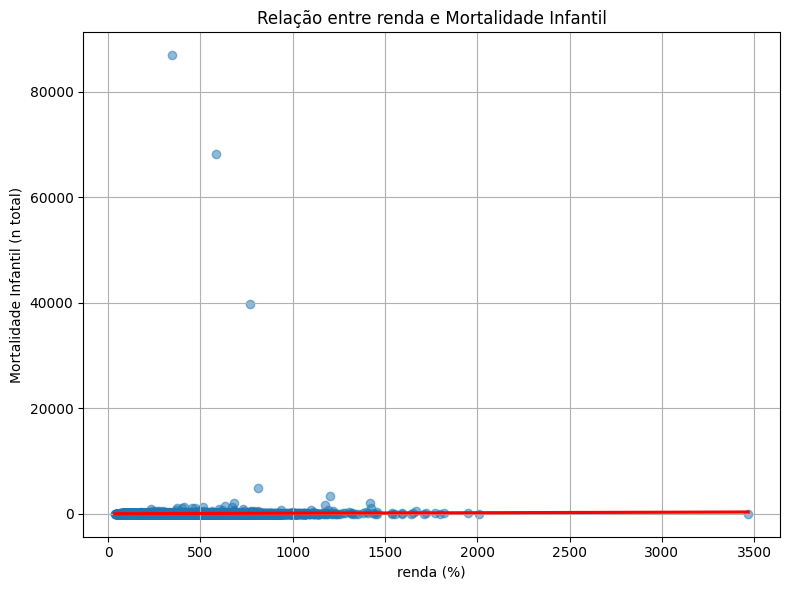

In [18]:
df_plot = df_base[["mortalidade", "renda"]].dropna()

plt.figure(figsize=(8, 6))
sns.regplot(data=df_plot, x="renda", y="mortalidade", scatter_kws={"alpha":0.5}, line_kws={"color":"red"})
plt.title("Relação entre renda e Mortalidade Infantil")
plt.xlabel("renda (%)")
plt.ylabel("Mortalidade Infantil (n total)")
plt.grid(True)
plt.tight_layout()
plt.show()

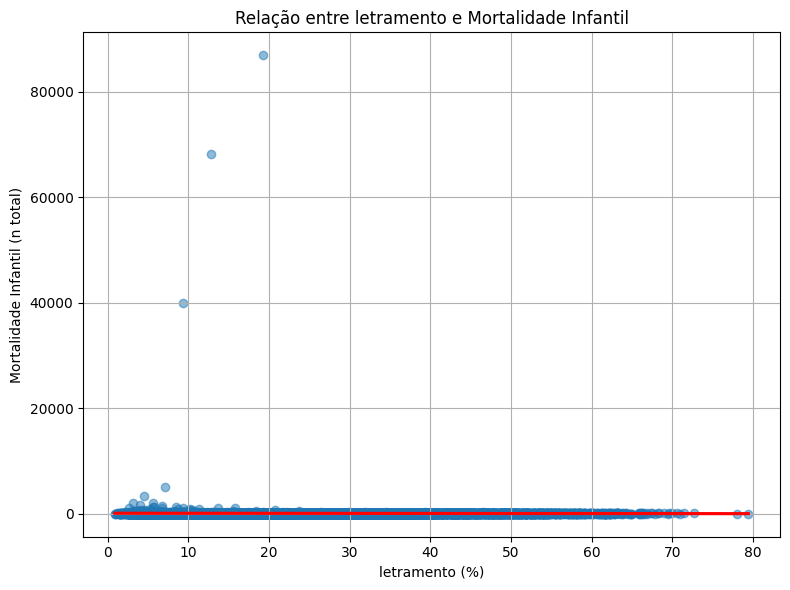

In [19]:
df_plot = df_base[["mortalidade", "letramento"]].dropna()

plt.figure(figsize=(8, 6))
sns.regplot(data=df_plot, x="letramento", y="mortalidade", scatter_kws={"alpha":0.5}, line_kws={"color":"red"})
plt.title("Relação entre letramento e Mortalidade Infantil")
plt.xlabel("letramento (%)")
plt.ylabel("Mortalidade Infantil (n total)")
plt.grid(True)
plt.tight_layout()
plt.show()

# 📘 Conclusão com Storytelling: Mortalidade Infantil e Saneamento no Brasil

Quando duas crianças nascem, ambas têm o mesmo potêncial de sobrevivência, mas os dados mostram que a criança que nasce em um município com acesso a água tratada, coleta de lixo regular e sistema de esgoto eficiente possui chances de sobrevivência diferente da criança que nasce onde esses serviços são escassos ou inexistentes.

Este estudo revela uma verdade impactante: a mortalidade infantil no Brasil está fortemente associada ao acesso a serviços básicos de saneamento. A análise de correlação de Pearson aponta que variáveis como acesso à água (r ≈ 0.87), coleta de lixo (r ≈ 0.86) e esgotamento sanitário (r ≈ 0.85) possuem correlação positiva alta com a mortalidade infantil total. Por mais que pareça contraditório, o gráfico de quartis nos permite visualizar que municípios com maiores populações e melhor infraestrutura também concentram mais óbitos em números absolutos, mas isso não necessariamente representa maiores taxas (relação entre o número de mortes e a população total de um município).

Além disso, ao analisar fatores como letramento e renda, a correlação é praticamente nula, indicando que, isoladamente, esses fatores socioeconômicos não explicam a variação nos óbitos infantis tão bem quanto o saneamento básico.

A regressão linear reforça a tendência: quanto maior a população com acesso a serviços essenciais, maior o número absoluto de óbitos — reflexo da maior densidade demográfica. Isso mostra a importância de olhar para taxas proporcionais e contextos locais.

## 🧩 Conclusão final:
A mortalidade infantil no Brasil ainda reflete desigualdades históricas de infraestrutura. A ausência de saneamento básico mata. Investimentos em água potável, coleta de lixo e esgoto são mais do que obras de engenharia — são políticas de saúde pública, de justiça social e de proteção à infância.

